# Stock Analysis Using Stocker 

This notebook will walk through a basic example of using the Stocker class to analyze a stock. The Stocker class is built on the quandl financial library and the fbprophet additive model library but hides all that code behind the scenes so you can focus on making sense of the data! 

In [1]:
# Command for plotting in the notebook
import matplotlib.pyplot as plt
%matplotlib inline

# Import the Class

Make sure to run this notebook in the same directory as stocker.py

In [2]:
from stocker import Stocker

## Instantiate a Stocker Object

An object is an instance of a Python class. To create a stocker object, we call the Stocker class with a valid stock ticker (there are over 3000 available). We will be using Microsoft throughout this example. If successful, the call will display that the data was retrieved and the date range. 

In [3]:
microsoft = Stocker('AMZN')

AMZN Stocker Initialized. Data covers 1997-05-15 to 2019-04-09.


The Stocker object contains a number of attributes, or pieces of data, and methods, functions that act on that data. 
One attribute is the stock history, which is a dataframe. We can assign this to a variable and then look at the dataframe.

In [4]:
stock_history = microsoft.stock
stock_history.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ds,y,Daily Change
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,1997-05-15,1.958333,-0.479167
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,1997-05-16,1.729167,-0.239583
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,1997-05-19,1.708333,-0.052084
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,1997-05-20,1.635417,-0.093750
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,1997-05-21,1.427083,-0.208334


The advantages of a class is that the data and the functions which act on the data are associated with a single variable. In effect, a class is an uber data-structure because it contains within it other data and functions. Here we will use one of the Stocker methods to plot the history of the stock. 

# Data Exploration

First, a basic plot of the stock history and a few statistics.

Maximum Adj Close = 2039.51 on 2018-09-04.
Minimum Adj Close = 1.40 on 1997-05-22.
Current Adj Close = 1835.84 on 2019-04-09.



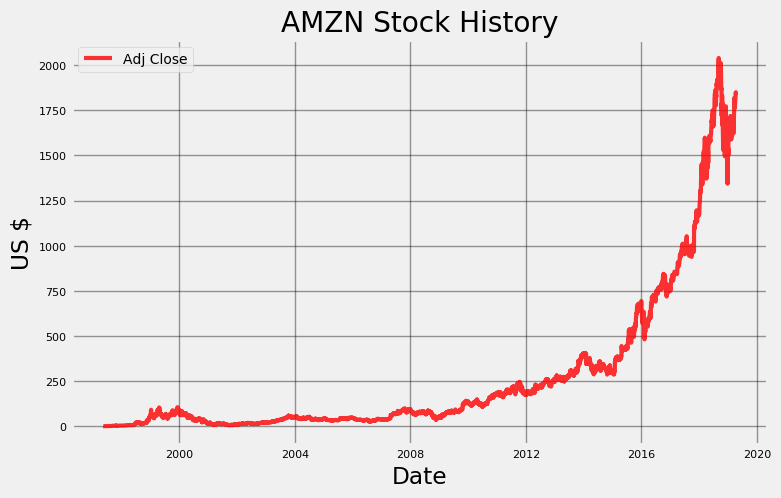

In [5]:
microsoft.plot_stock()

The plot_stock method accepts a number of arguments that control the range of data plotted, the statistics plotted, and the type of plot. In a Jupyter notebook, you can type a function, and with your cursor in the parenthesis, press shift + tab to view all the available function parameters. Here we will plot the daily change in price and the daily volumn as a percentage relative to the average value. 

Maximum Daily Change = 102.01 on 2018-12-26.
Minimum Daily Change = -121.12 on 2018-10-29.
Current Daily Change = -9.65 on 2019-04-09.

Daily Change
Maximum Volume = 16565000.00 on 2017-10-27.
Minimum Volume = 1585100.00 on 2017-12-22.
Current Volume = 3705600.00 on 2019-04-09.

Volume


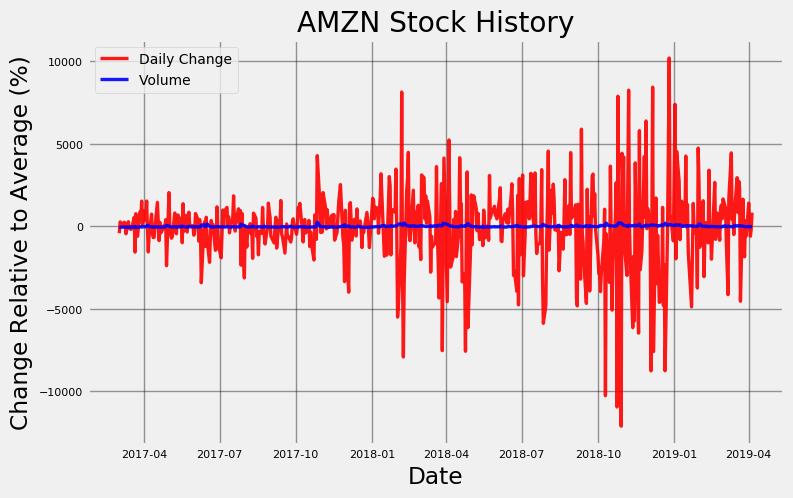

In [6]:
microsoft.plot_stock(start_date = '2017-03-02', end_date = '2019-04-05', 
                     stats = ['Daily Change', 'Volume'], plot_type='pct')

## Potential Profit

If we want to feel good about ourselves, we can pretend as if we had the fortune of mind to invest in Microsoft at the beginning with 100 shares. We can then evaluate the potential profit we would have from those shares. You can also change the dates if you feel like trying to lose money! 

AMZN Total buy and hold profit from 2017-06-29 00:00:00 to 2019-04-05 00:00:00 for 100 shares = $85828.00


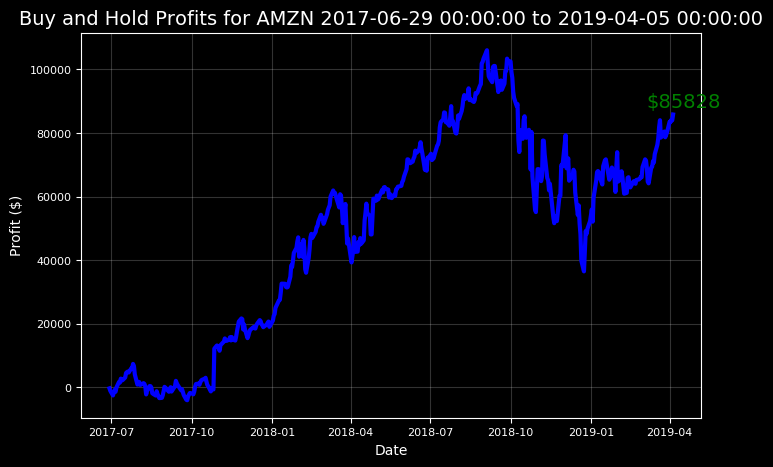

In [7]:
microsoft.buy_and_hold(start_date='2017-06-29', end_date='2019-04-05', nshares=100)

AMZN Total buy and hold profit from 2017-06-29 00:00:00 to 2019-02-05 00:00:00 for 100 shares = $67981.01


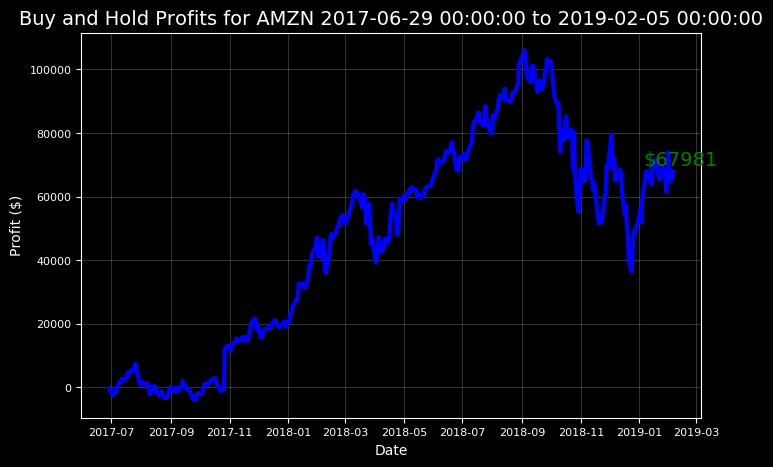

In [8]:
microsoft.buy_and_hold(start_date='2017-06-29', end_date='2019-02-05', nshares=100)

Surprisingly, we can lose money playing the stock market! 

# Trends and Patterns

An additive model represents a time series as an overall trend and patterns on different time scales (yearly, monthly, seasonally). While the overall direction of Microsoft is positive, it might happen to decrease every Tuesday, which if true, we could use to our advantage in playing the stock market. 

The Prophet library, developed by Facebook provides simple implementations of additive models. It also has advanced capabilities for those willing to dig into the code. The Stocker object does the tough work for us so we can use it to just see the results. 
Another method allows us to create a prophet model and inspect the results. This method returns two objects, model and data, which we need to save to plot the different trends and patterns.

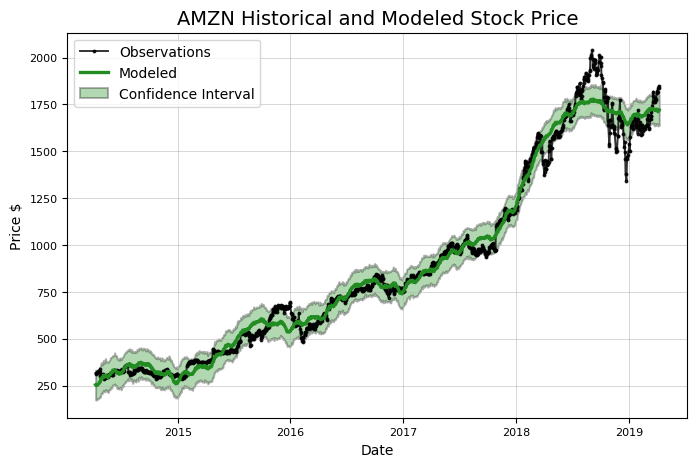

In [9]:
model, model_data = microsoft.create_prophet_model()

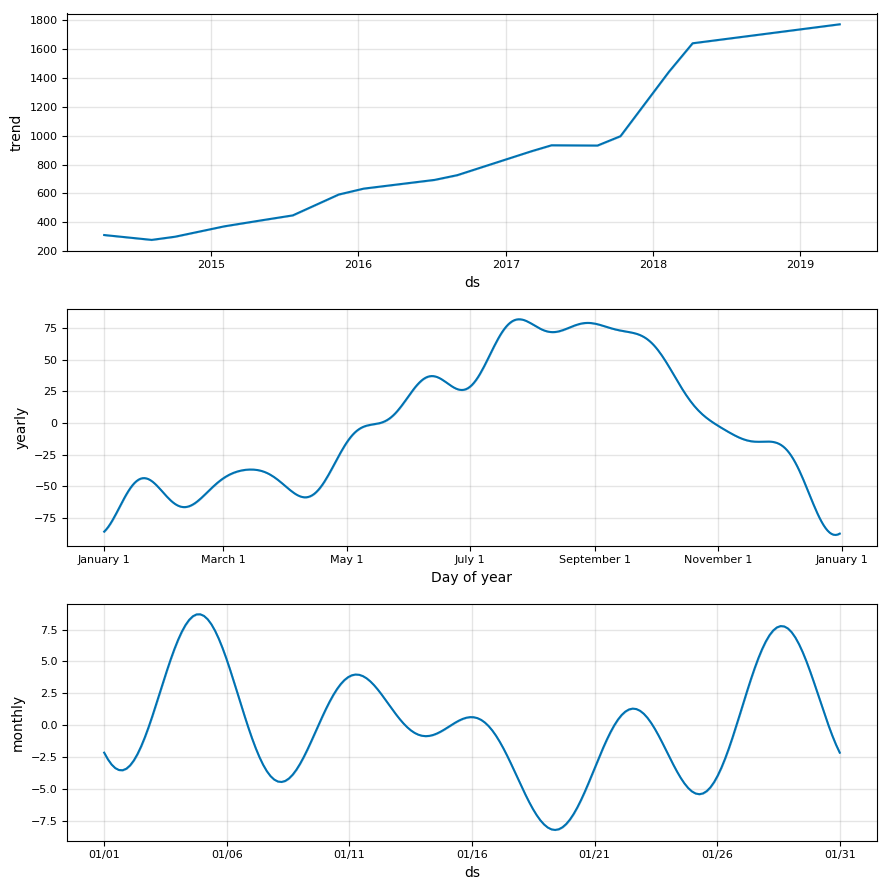

In [10]:
model.plot_components(model_data)
plt.show()

The overall trend is clearly in the upwards direction over the past three years. The trend over the course of a year appears to be a decreased in July, September, and October with the greatest increases in December and January. As the time scale decreases, the patterns grow more noisy. The monthly pattern appears to be slightly random, and I would not place too much confidence in investing between the 26th and 28th of the month! 

If we think there may be meaningful weekly trends, we can add in a weekly seasonality component by modifying the associated attribute on our Stocker object. We then recreate the model and plot the components. 

In [11]:
print(microsoft.weekly_seasonality)
microsoft.weekly_seasonality = True
print(microsoft.weekly_seasonality)

False
True


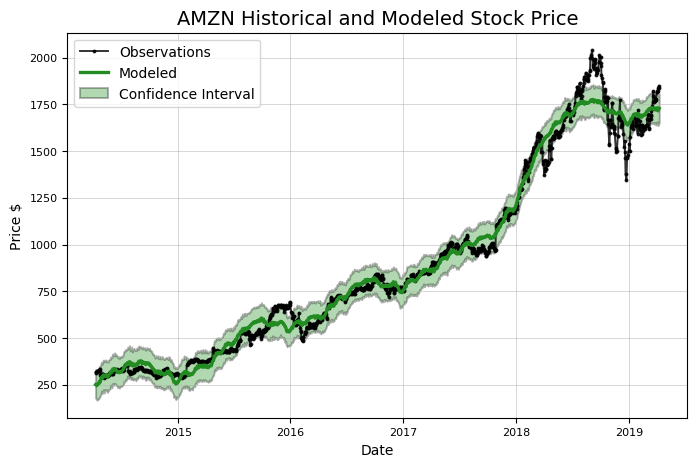

In [12]:
model, model_data = microsoft.create_prophet_model(days=0)

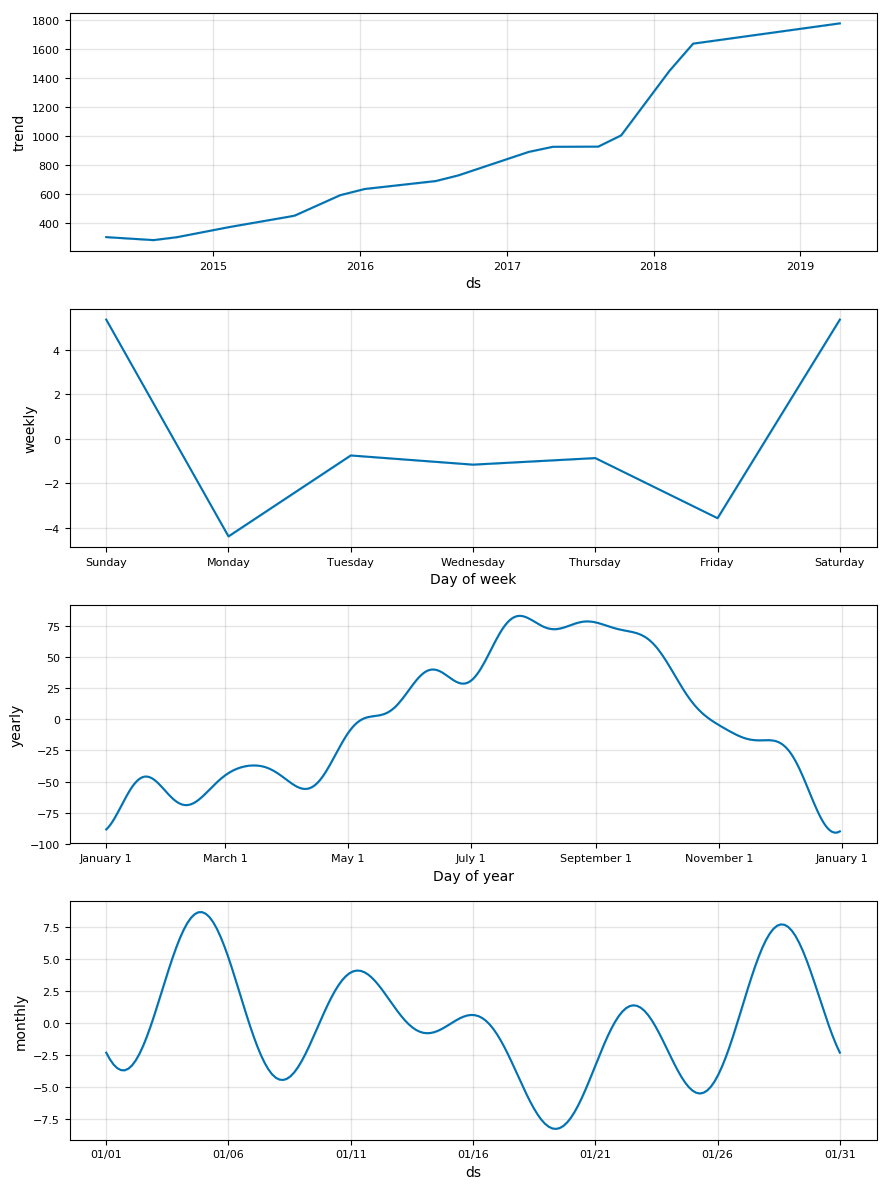

In [13]:
model.plot_components(model_data)
plt.show()

We have added a weekly component into the data. We can ignore the weekends because trading only occurs during the week (prices do slightly change overnight because of after-market trading, but the differences are small enough to not make affect our analysis). There is therefore no trend during the week. This is to be expected because on a short enough timescale, the movements of the market are essentially random. It is only be zooming out that we can see the overall trend. Even on a yearly basis, there might not be many patterns that we can discern. The message is clear: playing the daily stock market should not make sense to a data scientist! 

In [14]:
# Turn off the weekly seasonality because it clearly did not work! 
microsoft.weekly_seasonality=False

# Changepoints

One of the most important concepts in a time-series is changepoints. These occur at the maximum value of the second derivative. If that doesn't make much sense, they are times when the series goes from increasing to decreasing or vice versa, or when the series goes from increasing slowly to increasing rapidly. 

We can easily view the changepoints identified by the Prophet model with the following method. This lists the changepoints and displays them on top of the actual data for comparison.

In [15]:
microsoft.changepoint_date_analysis()

KeyError: 'Date'

Prophet only identifies changepoints in the first 80% of the data, but it still gives us a good idea of where the most movement happens. It we wanted, we could look up news about Microsoft on those dates and try to corroborate with the changes. However, I would rather have that done automatically so I built it into Stocker. 

If we specify a search term in the call to `changepoint_date_analysis`, behind the scenes, Stocker will query the Google Search Trends api for that term. The method then displays the top related queries, the top rising queries, and provides a graph. The graph is probably the most valuable part as it shows the frequency of the search term and the changepoints on top of the actual data. This allows us to try and corroborate the search term with either the changepoints or the share price. 

In [ ]:
microsoft.changepoint_date_analysis(search = 'snap profit')

There looks to be more signal in the search frequency graph than noise! I'm sure there may be correlations, but the question is whether there are meaningful causes. We can use any search term we want, and there are likely to be all sorts of correlations that are unexpected but are just noise. It might not be a great idea to assign the search frequency much weight. Nonetheless, it is an interesting exercise! 

In [ ]:
microsoft.changepoint_date_analysis(search = 'facebook profit')

# Predictions

Now that we have analyzed the stock, the next question is where is it going? For that we will have to turn to predictions! 
That is for another notebook, but here is a little idea of what we can do (check out the documentation on GitHub for full details).

In [ ]:
model, future = microsoft.create_prophet_model(days=10)